# FKLearn Tutorial: 

* <font size="4"> FKlearn is the nubank functional library for Machine Learning </font>


* <font size="4"> It was created with the idea of scaling machine learning through the company by standardizing model development and implementing an easy interface to allow all users to develop the best practices on Machine Learning </font>

# Input Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style("whitegrid")
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

##  Input Dataset

* <font size="4"> This dataset was created with simulated data about users spend behavior on Credit Card </font>
* <font size="4"> The model target is the average spend of the next 2 months and we created some features that can be related to that target </font>


In [3]:
df = pd.read_csv("~/Documents/fklearn/fklearn-tutorial-input-dataset-v2.csv")

In [4]:
df['month_date'] = pd.to_datetime(df.month_date)

In [5]:
df.head()

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target
0,0,19,4522.164394,2018-07-20,iphone,267.004052,475.642082,1075.560506,5295.632425,2018-08-13,NaN,4756.148989
1,0,20,4522.164394,2018-07-20,iphone,347.215587,475.642082,961.373740,4844.845213,2018-09-13,5070.238819,4588.231550
2,0,21,4522.164394,2018-07-20,iphone,360.962387,475.642082,875.161326,4667.452766,2018-10-14,4756.148989,4427.850902
3,0,22,4522.164394,2018-07-20,iphone,175.148355,475.642082,845.662587,4509.010335,2018-11-14,4588.231550,NaN
4,0,23,4522.164394,2018-07-20,iphone,196.706717,475.642082,919.350552,4346.691470,2018-12-15,4427.850902,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,120270.0,5009.393124,2.889906e+03,0.000000,2500.000000,5012.000000,7520.000000,9.999000e+03
month,120270.0,15.661819,5.526998e+00,1.000000,12.000000,17.000000,20.000000,2.300000e+01
income,120270.0,514833.434746,2.198910e+06,306.167688,3812.693902,5172.259271,6646.734907,9.999999e+06
bureau_score,108195.0,295.777300,1.347009e+02,0.004165,198.746660,292.422167,388.629698,9.919134e+02
spend_desire,120270.0,497.015332,1.998970e+02,-393.794672,362.457799,497.631450,632.484403,1.330080e+03
random_noise,120270.0,999.668522,9.995241e+01,593.475394,932.018665,999.448936,1066.753283,1.421348e+03
monthly_spend,120270.0,4447.670019,1.133402e+03,789.620288,3658.294416,4347.169429,5117.664037,1.161001e+04
avg_last_2_months_spend,110270.0,4446.642021,8.618590e+02,1508.402673,3844.270634,4385.282492,4976.734223,9.683371e+03
target,100703.0,4440.979413,8.602938e+02,1508.402673,3839.993212,4379.359931,4971.037317,9.683371e+03


In [7]:
features = ["income", "bureau_score", "spend_desire", "random_noise", "monthly_spend", "avg_last_2_months_spend"]

In [8]:
df.isna().sum()

id                             0
month                          0
income                         0
created_at                     0
phone_type                     0
bureau_score               12075
spend_desire                   0
random_noise                   0
monthly_spend                  0
month_date                     0
avg_last_2_months_spend    10000
target                     19567
dtype: int64

## Features and Target:
* <font size="4"> Month (M): Number of months since "2017-01-01" </font>
* <font size="4"> Income (I): N(5000, 2000) E [300, 20000] </font>
* <font size="4"> Phone Type (P): 4 categories </font>
* <font size="4"> Bureau Score (B): N(500 / (Month ** 0.1), 200) E [0, 1000] </font>
* <font size="4"> Spend Desire (W): N(500, 200) </font>
* <font size="4"> Random Noise (R): N(1000, 100) </font>
* <font size="4"> Monthly Spend: Max(0, (S * I + I ** 2 + P * W ** 2 + P * B + N(1, 0.3)) * N(2000, 1000)) </font>
* <font size="4"> Avg Last 2 Months Spend: (Spend(m) + Spend(m-1)) / 2 </font>
* <font size="4"> Target: (Spend(m + 1) + Spend(m + 2)) / 2 </font>

Text(0.5, 1.0, 'Amount of customers by month')

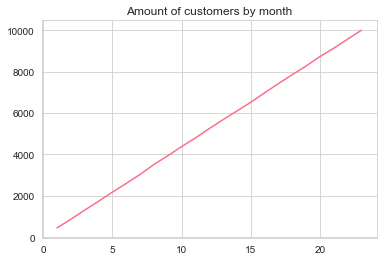

In [9]:
plt.plot(sorted(df.month.unique()), df.groupby("month").agg({"id": "count"}))
plt.title("Amount of customers by month")

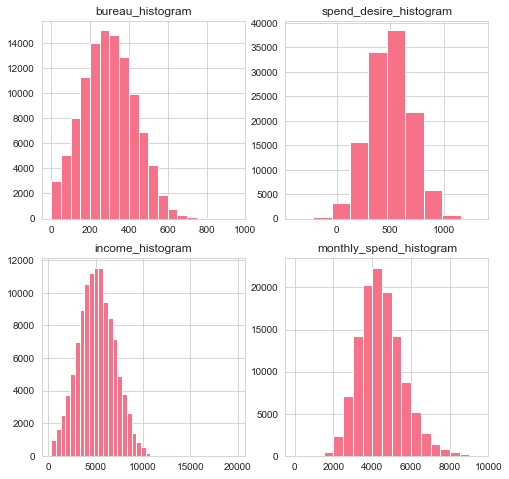

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0, 0].hist(df.bureau_score, range(0, 1000, 50))
axes[1, 0].hist(df.income, range(300, 20000, 500))
axes[0, 1].hist(df.spend_desire)
axes[1, 1].hist(df.monthly_spend, range(0, 10000, 500))

titles = ["bureau_histogram", "income_histogram", "spend_desire_histogram", "monthly_spend_histogram"]
axes[0, 0].set_title(titles[0])
axes[1, 0].set_title(titles[1])
axes[0, 1].set_title(titles[2])
axes[1, 1].set_title(titles[3])
plt.show()

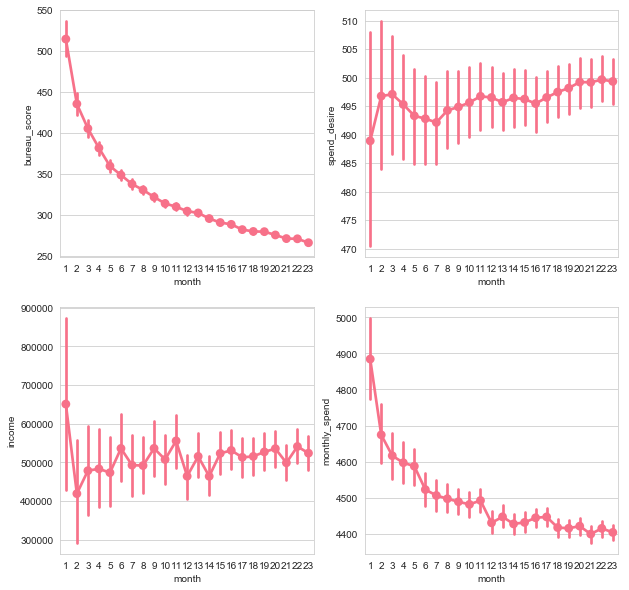

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.pointplot(x="month", y="bureau_score", data=df, ax=axes[0, 0])
sns.pointplot(x="month", y="income", data=df, ax=axes[1, 0])
sns.pointplot(x="month", y="spend_desire", data=df, ax=axes[0, 1])
sns.pointplot(x="month", y="monthly_spend", data=df, ax=axes[1, 1])
plt.show()

## Target Analysis

In [12]:
pd.DataFrame(df.groupby("month_date").apply(lambda x: x.target.isna().sum()), columns=["null_count_by_month"])

,null_count_by_month
month_date,
2017-02-01,0
2017-03-04,0
2017-04-04,0
2017-05-05,0
2017-06-05,0
2017-07-06,0
2017-08-06,0
2017-09-06,0
2017-10-07,0


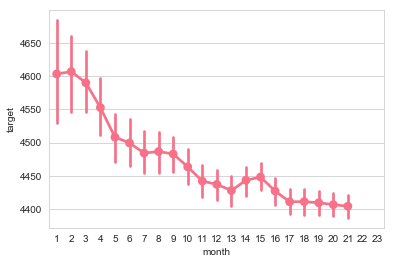

In [13]:
sns.pointplot(x="month", y="target", data=df)

# Getting started with fklearn: Creating a simple model

* <font size="4"> Fklearn allows you to get production ready models with ease </font>

* <font size="4"> Tradional steps of training a model like: Train-Test Splitting, Training and Validating are all implemented on fklearn </font>

## Spliting the dataset into train and holdout

* <font size="4"> On real problems we want to validate our model both in the same period and also on a different period to guarantee our model is a good predictor for the future </font>
<img src="imgs/Splitting_Data.png">

In [14]:
from fklearn.preprocessing.splitting import space_time_split_dataset

train_set, intime_outspace_hdout, outime_inspace_hdout, outime_outspace_hdout = space_time_split_dataset(df,
         train_start_date="2017-02-01",
         train_end_date="2018-07-01",
         holdout_end_date="2018-10-01",
         split_seed=42,
         space_holdout_percentage=0.2,
         space_column="id",
         time_column="month_date")

In [15]:
train_set.shape, intime_outspace_hdout.shape, outime_inspace_hdout.shape, outime_outspace_hdout.shape

((53305, 12), (13419, 12), (24850, 12), (4449, 12))

## Training:

* <font size="4"> On the training process we want to cap features that have unexpected values </font>
* <font size="4"> We want to encode categorical features </font>
* <font size="4">  We might want to fill missing values </font>
* <font size="4">  We want to train our model </font>
* <font size="4"> We want this transformations to be applied when scoring </font>
* <font size="4"> Similar to the fit and transform concept from sklearn </font>



<img src="imgs/Pipeline.png">

In [16]:
from fklearn.training.transformation import capper, prediction_ranger, label_categorizer
from fklearn.training.imputation import imputer
from fklearn.training.regression import lgbm_regression_learner
capper_fn = capper(columns_to_cap=["income"], precomputed_caps={"income": 20000.0})
ranger_fn = prediction_ranger(prediction_min=0.0, prediction_max=100000.0, prediction_column="prediction")
label_fn = label_categorizer(columns_to_categorize=["phone_type"])
imputer_fn = imputer(columns_to_impute=["bureau_score"], impute_strategy="median")
regression_fn = lgbm_regression_learner(features=features, target="target", learning_rate=0.1, num_estimators=200)

In [17]:
from fklearn.training.pipeline import build_pipeline
train_fn = build_pipeline(label_fn, capper_fn, imputer_fn, regression_fn, ranger_fn)

In [18]:
predict_fn, scored_train_set, train_logs = train_fn(train_set)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
scored_train_set.head()

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target,prediction
18,3,9,4159.498061,2017-09-26,0,192.392763,181.942558,1273.613785,4412.640581,2017-10-07,NaN,4170.070925,3864.627748
19,3,10,4159.498061,2017-09-26,0,238.973531,181.942558,1025.798515,4535.340752,2017-11-07,4473.990666,3161.149203,3902.731789
20,3,11,4159.498061,2017-09-26,0,305.450024,181.942558,1023.245425,3804.801099,2017-12-08,4170.070925,3158.383160,3840.322509
21,3,12,4159.498061,2017-09-26,0,474.381722,181.942558,972.002071,2517.497308,2018-01-08,3161.149203,3733.840173,3874.139880
22,3,13,4159.498061,2017-09-26,0,491.569252,181.942558,1001.202505,3799.269011,2018-02-08,3158.383160,3429.540635,3786.501556


In [20]:
scored_outime_outspace_hdout = predict_fn(outime_outspace_hdout)
scored_intime_outspace_hdout = predict_fn(intime_outspace_hdout)
scored_outime_inspace_hdout = predict_fn(outime_inspace_hdout)

In [21]:
scored_outime_outspace_hdout[["id", "month_date", "income", "bureau_score", "target", "prediction"]].head()

,id,month_date,income,bureau_score,target,prediction
9,1,2018-07-13,4932.132535,288.619854,5116.067742,5337.765225
10,1,2018-08-13,4932.132535,376.036959,4872.569666,5376.376486
11,1,2018-09-13,4932.132535,277.461815,5973.371718,5263.127132
180,16,2018-07-13,3825.722225,227.229072,4814.508043,4421.280720
181,16,2018-08-13,3825.722225,427.216025,3683.895089,4469.370258


## Evaluation:
* <font size="4"> We want to evaluate the performance of our model using multiple metrics for each dataframe (out_of_time, out_of_space, out_of_time_and_space) </font>


<img src="imgs/EvalFn.png">

In [22]:
from fklearn.validation.evaluators import r2_evaluator, spearman_evaluator, combined_evaluators

In [23]:
r2_eval_fn = r2_evaluator(prediction_column="prediction", target_column="target")
spearman_eval_fn = spearman_evaluator(prediction_column="prediction", target_column="target")
eval_fn = combined_evaluators(evaluators=[r2_eval_fn, spearman_eval_fn])

In [24]:
outime_outspace_hdout_logs = eval_fn(scored_outime_outspace_hdout)
intime_outspace_hdout_logs = eval_fn(scored_intime_outspace_hdout)
outime_inspace_hdout_logs = eval_fn(scored_outime_inspace_hdout)

In [25]:
{"out_of_time": outime_outspace_hdout_logs, 
 "in_time": intime_outspace_hdout_logs,
  "out_of_time_and_space": outime_inspace_hdout_logs}

{'out_of_time': {'r2_evaluator__target': 0.2121781111382176,
  'spearman_evaluator__target': 0.4472821975927104},
 'in_time': {'r2_evaluator__target': 0.2090246267333823,
  'spearman_evaluator__target': 0.4482512955556436},
 'out_of_time_and_space': {'r2_evaluator__target': 0.2239345445712667,
  'spearman_evaluator__target': 0.4659935688172329}}

## Extractors
* <font size="4"> We want to transform this logs into dataframes that we can visualize better </font>

<img src="imgs/Extractor.png" style="width: 500px;">

In [26]:
from fklearn.metrics.pd_extractors import evaluator_extractor, combined_evaluator_extractor, extract
r2_extractor = evaluator_extractor(evaluator_name="r2_evaluator__target")
spearman_extractor = evaluator_extractor(evaluator_name="spearman_evaluator__target")
full_extractor = combined_evaluator_extractor(base_extractors=[r2_extractor, spearman_extractor])

In [27]:
pd.concat(
    [full_extractor(outime_outspace_hdout_logs).assign(part="out_of_time"),
    full_extractor(intime_outspace_hdout_logs).assign(part="in_time_out_of_space"),
    full_extractor(outime_inspace_hdout_logs).assign(part="out_of_time_and_space")])

,r2_evaluator__target,spearman_evaluator__target,part
0,0.212178,0.447282,out_of_time
0,0.209025,0.448251,in_time_out_of_space
0,0.223935,0.465994,out_of_time_and_space


# Learning Curves:

<img src="imgs/LearningCurves.png">

<font size="5"> We can reuse our previously defined training function and evaluators! </font>


## Could we improve if we had more data, AKA Spatial Learning Curve

* <font size="4"> If we had more data we could use that for training and see how much the model improves </font>
* <font size="4"> To estimate that we can train with subsamples of the full training set and check how performance changes </font>


<img src="imgs/SpatialLearningCurves.png">

In [28]:
from fklearn.validation.splitters import spatial_learning_curve_splitter

split_fn = spatial_learning_curve_splitter(space_column="id", 
                                           time_column="month_date",
                                           training_limit="2018-04-01", 
                                           train_percentages=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0])

In [29]:
from fklearn.validation.validator import parallel_validator

spatial_learning_curve_logs = parallel_validator(train_set, split_fn, train_fn, eval_fn, n_jobs=8)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/ut

In [30]:
spatial_learning_curve_logs

{'train_log': [{'label_categorizer': {'transformed_column': ['phone_type'],
    'replace_unseen': nan,
    'running_time': '0.017 s'},
   'capper': {'caps': {'income': 20000.0},
    'transformed_column': ['income'],
    'precomputed_caps': {'income': 20000.0},
    'running_time': '0.035 s'},
   'imputer': {'impute_strategy': 'median',
    'columns_to_impute': ['bureau_score'],
    'training_proportion_of_nulls': {'bureau_score': 0.10269749518304432},
    'statistics': array([325.77291813]),
    'running_time': '0.078 s'},
   'lgbm_regression_learner': {'features': ['income',
     'bureau_score',
     'spend_desire',
     'random_noise',
     'monthly_spend',
     'avg_last_2_months_spend'],
    'target': 'target',
    'prediction_column': 'prediction',
    'package': 'lightgbm',
    'package_version': '2.2.3',
    'parameters': {'eta': 0.1,
     'objective': 'regression',
     'num_estimators': 200},
    'feature_importance': {'income': 964,
     'bureau_score': 868,
     'spend_desire

In [31]:
data = extract(spatial_learning_curve_logs['validator_log'], full_extractor)

In [32]:
data

,r2_evaluator__target,spearman_evaluator__target,fold_num,train_start,train_end,train_size,test_start,test_end,test_size,percentage
0,0.121551,0.376381,0,2017-02-01,2018-03-11,5190,2018-04-11,2018-06-12,16717,0.1
0,0.166616,0.410266,1,2017-02-01,2018-03-11,10149,2018-04-11,2018-06-12,16717,0.2
0,0.192355,0.435898,2,2017-02-01,2018-03-11,19572,2018-04-11,2018-06-12,16717,0.4
0,0.199584,0.443448,3,2017-02-01,2018-03-11,27950,2018-04-11,2018-06-12,16717,0.6
0,0.206107,0.446962,4,2017-02-01,2018-03-11,34467,2018-04-11,2018-06-12,16717,0.8
0,0.205306,0.446203,5,2017-02-01,2018-03-11,36588,2018-04-11,2018-06-12,16717,1.0


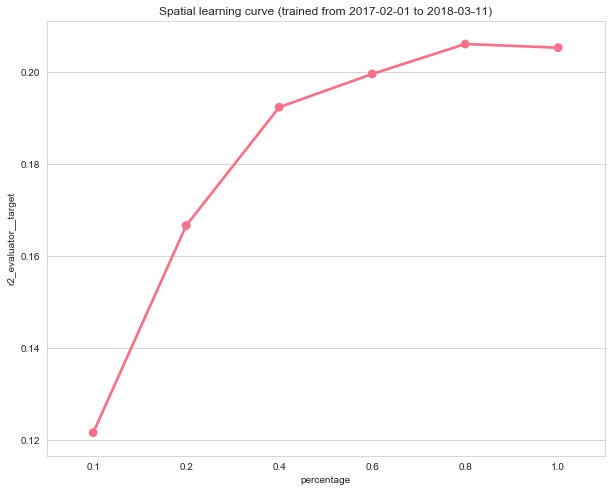

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=data, ax=ax, x="percentage", y="r2_evaluator__target")
plt.title("Spatial learning curve (trained from %s to %s)" % (data.train_start.dt.date.min(), data.train_end.dt.date.max()));

## Performance over time

* <font size="4"> That metric can be thought as split your dataset month by month and computing the desired metrics </font>

* <font size="4"> We can do that with ease using our split evaluators </font>

In [34]:
from fklearn.validation.evaluators import split_evaluator
from fklearn.metrics.pd_extractors import split_evaluator_extractor
out_of_space_holdout = pd.concat([scored_intime_outspace_hdout, scored_outime_outspace_hdout])

monthly_eval_fn = split_evaluator(eval_fn=eval_fn,
                                  split_col="month",
                                  split_values=list(range(0, 25)))

monthly_extractor = split_evaluator_extractor(base_extractor=full_extractor, 
                                              split_col="month", 
                                              split_values=list(range(0, 25)))

In [35]:
out_of_space_logs = monthly_eval_fn(out_of_space_holdout)

In [36]:
monthly_performance = monthly_extractor(out_of_space_logs)

In [37]:
monthly_performance

,r2_evaluator__target,spearman_evaluator__target,split_evaluator__month
0,NaN,NaN,0
0,0.148627,0.361664,1
0,0.192676,0.435343,2
0,0.263333,0.480248,3
0,0.163954,0.428928,4
0,0.212259,0.488213,5
0,0.246749,0.479712,6
0,0.195455,0.428545,7
0,0.211063,0.460734,8
0,0.197037,0.452042,9


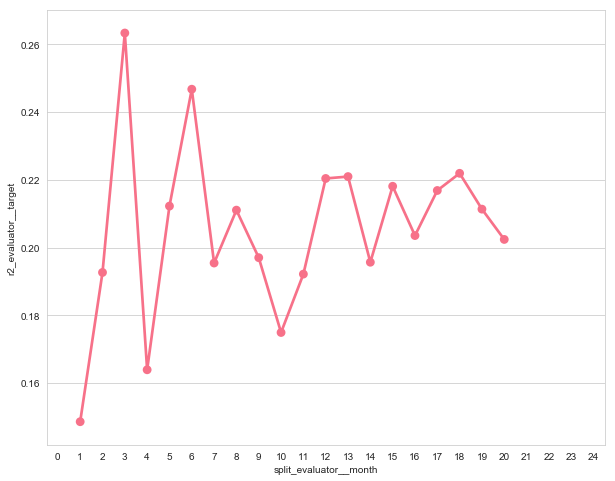

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=monthly_performance, ax=ax, x="split_evaluator__month", y="r2_evaluator__target")

##  Impact of More Data on Monthly Performance?

* <font size="4"> We want both our previous way of spliting our dataset and the evaluator we created </font>

* <font size="4"> We can use both to create a new spatial learning curve! </font>

In [39]:
monthly_spatial_learning_curve_logs = parallel_validator(train_set,
                                                         split_fn,
                                                         train_fn,
                                                         monthly_eval_fn,
                                                         n_jobs=8)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/ut

In [40]:
monthly_data = extract(monthly_spatial_learning_curve_logs['validator_log'], monthly_extractor).loc[lambda df: df.r2_evaluator__target.notna()]

In [41]:
monthly_data

,r2_evaluator__target,spearman_evaluator__target,split_evaluator__month,fold_num,train_start,train_end,train_size,test_start,test_end,test_size,percentage
0,0.107379,0.364467,15,0,2017-02-01,2018-03-11,5240,2018-04-11,2018-06-12,16717,0.1
0,0.131670,0.393196,16,0,2017-02-01,2018-03-11,5240,2018-04-11,2018-06-12,16717,0.1
0,0.144000,0.399221,17,0,2017-02-01,2018-03-11,5240,2018-04-11,2018-06-12,16717,0.1
0,0.150120,0.397450,15,1,2017-02-01,2018-03-11,10195,2018-04-11,2018-06-12,16717,0.2
0,0.178749,0.425420,16,1,2017-02-01,2018-03-11,10195,2018-04-11,2018-06-12,16717,0.2
0,0.184508,0.431947,17,1,2017-02-01,2018-03-11,10195,2018-04-11,2018-06-12,16717,0.2
0,0.183690,0.421595,15,2,2017-02-01,2018-03-11,19397,2018-04-11,2018-06-12,16717,0.4
0,0.193567,0.436818,16,2,2017-02-01,2018-03-11,19397,2018-04-11,2018-06-12,16717,0.4
0,0.200179,0.447567,17,2,2017-02-01,2018-03-11,19397,2018-04-11,2018-06-12,16717,0.4
0,0.189484,0.427309,15,3,2017-02-01,2018-03-11,27955,2018-04-11,2018-06-12,16717,0.6


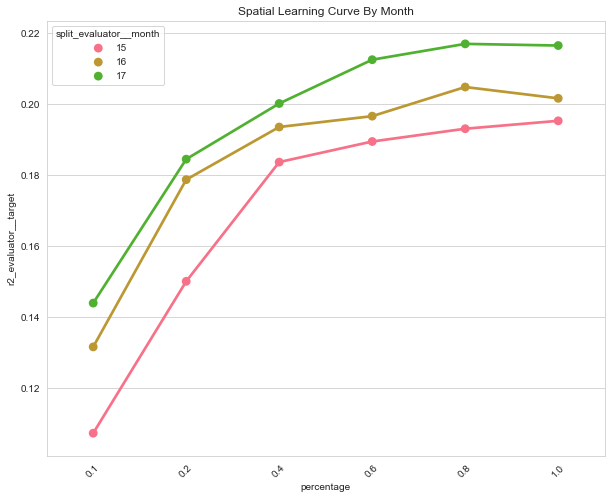

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=monthly_data, ax=ax, x="percentage", y="r2_evaluator__target", hue="split_evaluator__month")
plt.title("Spatial Learning Curve By Month")
plt.xticks(rotation=45);

# What else does fklearn provide me?

* <font size="4"> Several other learning curves that can be used depending on what you want to evaluate </font>

* <font size="4"> Several other algorithms for models </font>

* <font size="4"> Other tools with similar interface for feature selection, parameter tuning </font>

* <font size="4"> All this methods are integrated with similar signatures in a way that is easy to reuse training, spliting and evaluation functions </font>

